# Where Should There Be More Electric Charging Hubs in New York State?
### Cecilia Pershyn
#### CIS512 
  
  
New York State is a leading state in clean and renewable energy, with a commitment to have 50% of the state’s electricity supplied by renewable sources by 2030. Thanks to impressive growth in solar, wind, hydro and biomass power in New York State, plug-in electric vehicles (EVs) have particularly low greenhouse gas emissions here.  

EVs are a cheap and clean alternative to gas-fueled vehicles. However, small battery storage capacity limits the amount of electric fuel that can be carried on board the vehicle.  In order to make the use of EVs more convenient, and help extend vehicle mileage, there is a need to expand the electric power grid and create more public fueling stations.   
  
In this study I will look at vehicle registrations in NYS to determine where electric vehicles are registered.  I will look at where charging ports are located in the state and compare to the zip codes with high electric vehicle registrations to determine which zip codes have the highest demand for new charging ports.
 
Data Sources:
  
Data on Charging Stations
https://data.ny.gov/d/7rrd-248n?category=Energy-Environment&view_name=Electric-Vehicle-Charging-Stations-in-New-York   
  
Data on Electric Vehicle Registration    
https://data.ny.gov/d/uu25-czyc?category=Transportation&view_name=Electric-Vehicles-per-County


Bibliography:  

How New York Uses Renewable Energy. (n.d.). Retrieved from http://www.dec.ny.gov/energy/83070.html  
Date Visited: 10/29/18  
  
How New York Uses Renewable Energy. (n.d.). Retrieved from http://www.dec.ny.gov/energy/83070.html  
Date Visited: 10/29/18


In [82]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#use this function later in notebook to change NaN in "complete" data frame to 0
def fix_count(x):
    if x=='NaN':
        x=0
    elif x=='':
        x=0
    elif type(x) == type(8.8):
        x=0
    return int(x)
#This method did not work.  I attempted to read the csv using a converter, but then realized
#the count, where the NaN occurs, does not happen with the original csv file, but later when 
#I combine the dataframes.  So I will work on converting the NaN later.

sns.set(style="darkgrid")

### Electric Vehicle Registration Data  
  
*Import and read data table*

In [122]:
vehicle_reg = pd.read_csv('Vehicle__Snowmobile__and_Boat_Registrations.csv')

In [123]:
vehicle_reg.head()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,VEH,8995,PAS,BUFFALO,NY,14207,ERIE,1913,DE/EL,2DSD,ELECTRIC,1100,NaN,NaN,05/31/2018,07/01/2020,MR,N,N,N
1,VEH,607SR2131A,PAS,N SYRACUSE,NY,13212,ONONDAGA,1977,CITI,2DSD,ELECTRIC,2590,NaN,NaN,11/21/2017,11/20/2019,RD,N,N,N
2,VEH,537LS7D46CT083476,PAS,NEWFANE,NY,14108,NIAGARA,2012,AZURE,SUBN,ELECTRIC,4005,NaN,NaN,05/16/2017,05/17/2019,WH,N,N,N
3,VEH,53TBH2MC1BE900166,PAS,ROCKVILLE CTR,NY,11570,NASSAU,2011,THINK,2DSD,ELECTRIC,2348,NaN,NaN,04/18/2018,05/06/2020,RD,N,N,N
4,VEH,53G1B4A47DB000347,PAS,BROOKLYN,NY,11223,KINGS,2013,CODA,4DSD,ELECTRIC,3682,NaN,NaN,08/08/2018,08/07/2020,BK,N,N,N


*Create a new table with only the relevant information to my study*

In [125]:
veh = vehicle_reg[['County', 'Zip']]
veh[:5]

,County,Zip
0,ERIE,14207
1,ONONDAGA,13212
2,NIAGARA,14108
3,NASSAU,11570
4,KINGS,11223


*There are 9222 registered electric vehicles in NYS*

In [86]:
len(veh)

9222

*Create a data series showing the number of electric vehicles per zip code in New York State*

In [133]:
veh['Number of Vehicles'] = ''
reg_car = veh.groupby(['County'], as_index=False)
count_car = reg_car.agg({'Number of Vehicles':'count'}).sort_values(['Number of Vehicles','County'], ascending=[False, True])
count_car[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,County,Number of Vehicles
59,WESTCHESTER,1577
28,NASSAU,1486
51,SUFFOLK,1196
29,NEW YORK,875
40,QUEENS,456


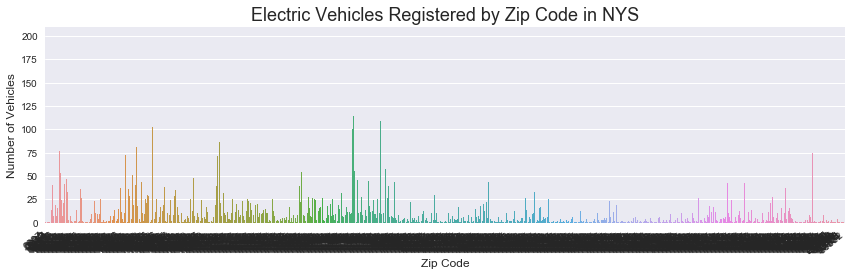

In [88]:
ax = sns.countplot(x = "Zip", data = veh)
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation = 40, 
                   ha='right')
ax.figure.set_size_inches(12,4)
ax.axes.set_title("Electric Vehicles Registered by Zip Code in NYS",fontsize=18)
ax.set_xlabel("Zip Code",fontsize=12)
ax.set_ylabel("Number of Vehicles",fontsize=12)
#ax_seg = plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout() 
plt.show()
#The best way to display this would be in GIS

In [89]:
vehicle_reg_zip = vehicle_reg.groupby(['Zip'])
vrzip = vehicle_reg_zip.size().sort_values(ascending = False)

In [90]:
vrzip = vrzip[:25]
vrzip

Zip
10583    200
11746    114
11791    109
10580    103
11743    101
11050     87
10538     81
10013     77
14850     75
10514     73
11030     72
11576     72
14534     67
10504     67
10011     65
10023     60
11797     58
11747     55
11545     54
10014     53
11733     52
10528     51
11568     50
11201     49
10956     48
dtype: int64

## Charging Hubs in New York State  
  
*Import and read data*

In [91]:
charge_hub = pd.read_csv('Electric_Vehicle_Charging_Stations_in_New_York.csv')
charge_hub.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Location
0,ELEC,Hudson Valley Community College - TEC-SMART Bu...,345 Hermes Rd,NaN,Malta,NY,12020,NaN,518-629-7075,E,...,42.971670,-73.774182,06/02/2017,36532,2018-02-06 21:00:03 UTC,SG,NaN,NaN,10/15/2010,"(42.97167, -73.774182)"
1,ELEC,EDISONPARKFAST,451 9th Ave,LOC #250 #2 LOT#250; ChargePoint America Program,New York,NY,10018,NaN,888-758-4389,E,...,40.754512,-73.995938,10/28/2018,36945,2018-10-28 09:03:02 UTC,NaN,NaN,NaN,NaN,"(40.754512, -73.995938)"
2,ELEC,CARCHARGING,350 W 50th St,ICON MERCURY; Icon parking see attendant for a...,New York,NY,10019,NaN,888-758-4389,E,...,40.763245,-73.988648,10/28/2018,37169,2018-10-28 09:03:02 UTC,NaN,NaN,NaN,NaN,"(40.7632446, -73.9886475)"
3,ELEC,CARCHARGING,310 W 39th St,ICON 310 W 39TH; Icon Parking systems see vale...,New York,NY,10018,NaN,888-758-4389,E,...,40.755440,-73.992027,10/28/2018,38530,2018-10-28 09:03:02 UTC,NaN,NaN,NaN,NaN,"(40.7554398, -73.9920273)"
4,ELEC,EDISONPARKFAST,50 W 44th St,LOC #100 LEVEL3; Located in basement level of ...,New York,NY,10036,NaN,888-758-4389,E,...,40.755546,-73.982307,10/28/2018,38981,2018-10-28 09:03:02 UTC,NaN,NaN,NaN,NaN,"(40.755546, -73.982307)"


*Create a new table with only the relevant information to my study*

In [134]:
hub = charge_hub[['ZIP','Latitude','Longitude',]]
hub[:4]

,ZIP,Latitude,Longitude
0,12020,42.971670,-73.774182
1,10018,40.754512,-73.995938
2,10019,40.763245,-73.988648
3,10018,40.755440,-73.992027


*There are 1030 charging ports in New York State*

In [93]:
len(hub)

1030

*Map of Charging Hubs in New York State*

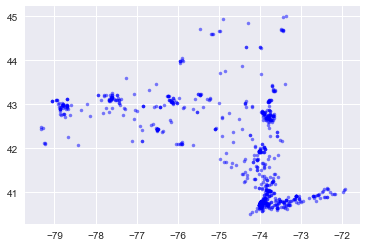

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hub['Longitude'], hub['Latitude'],'b.',alpha=0.5)

*Create a data series showing the number of charging hugs per zip code in New York State*

In [106]:
hub['Number of Charge Hubs'] = ''
ch_hub = hub.groupby(['ZIP'], as_index=False)
count_hub = ch_hub.agg({'Number of Charge Hubs':'count'}).sort_values(['Number of Charge Hubs','ZIP'], ascending=[False, True])
count_hub[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ZIP,Number of Charge Hubs
14,10019,34
11,10016,22
240,12401,21
15,10021,17
16,10022,17


convert series count_hub to dataframe

In [135]:
count_hub1 = count_hub.rename(columns={1:'# of Charge Hubs'})
count_hub1[:5]

,ZIP,Number of Charge Hubs
14,10019,34
11,10016,22
240,12401,21
15,10021,17
16,10022,17


In [108]:
charge_hub_zip = charge_hub.groupby(['ZIP'])
chzip = charge_hub_zip.size().sort_values(ascending = False)

In [109]:
chzip = chzip[:25]
chzip

ZIP
10019    34
10016    22
12401    21
10022    17
10021    17
10023    16
14850    16
10065    15
12866    15
10028    14
10011    14
10024    13
11201    12
10025    12
10003    12
10036    11
10014     9
14221     9
10013     9
10075     8
11790     8
10001     8
11901     7
12205     7
11215     7
dtype: int64

*Combine count_car and count_hub dataframes using concat, name the resulting table "complete"*

In [110]:
frames = [count_car, count_hub]
complete = pd.concat(frames, sort=True)
complete

,Number of Charge Hubs,Number of Vehicles,ZIP,Zip
136,NaN,200.0,NaN,10583.0
389,NaN,114.0,NaN,11746.0
423,NaN,109.0,NaN,11791.0
135,NaN,103.0,NaN,10580.0
388,NaN,101.0,NaN,11743.0
220,NaN,87.0,NaN,11050.0
115,NaN,81.0,NaN,10538.0
18,NaN,77.0,NaN,10013.0
968,NaN,75.0,NaN,14850.0
101,NaN,73.0,NaN,10514.0


In [111]:
#attempting to use replace to get rid of NaN
complete.replace('NaN',0)

,Number of Charge Hubs,Number of Vehicles,ZIP,Zip
136,NaN,200.0,NaN,10583.0
389,NaN,114.0,NaN,11746.0
423,NaN,109.0,NaN,11791.0
135,NaN,103.0,NaN,10580.0
388,NaN,101.0,NaN,11743.0
220,NaN,87.0,NaN,11050.0
115,NaN,81.0,NaN,10538.0
18,NaN,77.0,NaN,10013.0
968,NaN,75.0,NaN,14850.0
101,NaN,73.0,NaN,10514.0


In [112]:
#attempt #2: use fillna() to replace NaN in dataframe with 0
total = complete['Number of Charge Hubs'].fillna(value=0, inplace=True)
total
#The kernel runs, but there is no visible output.

In [113]:
#YES! finally got it :)  
#This code kills two birds with one stone, since it also converts to intergers
complete = complete.fillna(0).astype(int)
complete

,Number of Charge Hubs,Number of Vehicles,ZIP,Zip
136,0,200,0,10583
389,0,114,0,11746
423,0,109,0,11791
135,0,103,0,10580
388,0,101,0,11743
220,0,87,0,11050
115,0,81,0,10538
18,0,77,0,10013
968,0,75,0,14850
101,0,73,0,10514


Converting the series "complete" to dataframe "complete_df"

In [136]:
#complete_df = complete.to_frame().reset_index()
#complete_df = complete_df.rename(columns={0:'Zip Code', 1:'# of Charge Hubs', 2:'#of EV'})
#complete_df[:5]

**Next Steps** 
1. Combine count_car and count_hub data series into one data frame to compare the number of cars in each zip code and the number of charging hubs.  This will help give an idea of demand for hubs. (*Completed*)
3. Create a new column in charge_hub for County.  Match County to zip code in charge_hub, try creating a new dataframe called County from vehicle_reg with only zip and county columns, and work using that.
2. Map number of cars per zip code and the locations of charging hubs using geocoding and ArcGIS

## Getting "County" column in charging hubs dataframe

In [21]:
county = vehicle_reg[['Zip','County']]
county[:5]

,Zip,County
0,14207,ERIE
1,13212,ONONDAGA
2,14108,NIAGARA
3,11570,NASSAU
4,11223,KINGS


In [116]:
#This is not what I was going for, but this might be helpful. Compare charging hubs 
#and electric vehicles by county rather than zip code
county['Number of Vehicles'] = ''
reg_county = county.groupby(['County'], as_index = False)
count_county = reg_county.agg({'Number of Vehicles':'count'}).sort_values(['Number of Vehicles','County'], ascending=[False, True])
count_county

,County,Number of Vehicles
59,WESTCHESTER,1577
28,NASSAU,1486
51,SUFFOLK,1196
29,NEW YORK,875
40,QUEENS,456
26,MONROE,423
23,KINGS,422
14,ERIE,283
43,ROCKLAND,251
0,ALBANY,226


In [25]:
#ax = sns.countplot(x = 'County', data = count_county)
#ax.set_xticklabels(ax.get_xticklabels(), 
                   #rotation = 40, 
                   #ha='right')
#ax.figure.set_size_inches(12,4)
#ax.axes.set_title('Electric Vehicles Registered by County in NYS',fontsize=18)
#ax.set_xlabel('County',fontsize=12)
#ax.set_ylabel('Number of Vehicles',fontsize=12)
#ax_seg = plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
#plt.tight_layout() 
#plt.show()

## Counties to Regions

Create a table in Excel. Split NYS into 9 regions according to NYS DEC. Upload table to notebook, attach to county_county dataframe.  Create a new dataframe that counts the EV registrations in each region.

In [190]:
from pandas import DataFrame
region = pd.read_excel(r'/Users/ceciliapershyn/CIS_512_Term_Project/county_to_region.xlsx')
region = DataFrame(region, columns=['Region_Code','Region','County'])
region[:5]

,Region_Code,Region,County
0,1,Long Island,Nassau
1,1,Long Island,Suffolk
2,2,New York City,Kings
3,2,New York City,Bronx
4,2,New York City,New York


Convert County column to uppercase so its format will match the County columns in other tables when I do the join.

In [191]:
region['County'] = region['County'].str.upper()
region.rename(index=str, columns={"County": "county"})
region[:5]

,Region_Code,Region,County
0,1,Long Island,NASSAU
1,1,Long Island,SUFFOLK
2,2,New York City,KINGS
3,2,New York City,BRONX
4,2,New York City,NEW YORK


In [167]:
#attempt 1: concat
frames2 = [count_county, region]
count_reg = pd.concat(frames2, axis=1, join='inner', sort=True)
count_reg

,County,Number of Vehicles,Region_Code,Region,County
0,ALBANY,226,1,Long Island,NASSAU
1,ALLEGANY,2,1,Long Island,SUFFOLK
2,BRONX,77,2,New York City,KINGS
3,BROOME,45,2,New York City,BRONX
4,CATTARAUGUS,7,2,New York City,NEW YORK
5,CAYUGA,13,2,New York City,QUEENS
6,CHAUTAUQUA,16,2,New York City,RICHMOND
7,CHEMUNG,21,3,Lower Hudson Valley,DUTCHESS
8,CHENANGO,7,3,Lower Hudson Valley,ORANGE
9,CLINTON,21,3,Lower Hudson Valley,PUTNAM


In [192]:
#attempt 2: join veh and region
veh_count_reg = pd.merge_ordered(count_county, region, on='County', fill_method=None, how='outer')
veh_count_reg

,County,Number of Vehicles,Region_Code,Region
0,ALBANY,NaN,4.0,Capital Region
1,ALBANY,226.0,NaN,NaN
2,ALLEGANY,NaN,9.0,Western New York
3,ALLEGANY,2.0,NaN,NaN
4,BRONX,NaN,2.0,New York City
5,BRONX,77.0,NaN,NaN
6,BROOME,NaN,7.0,Central New York
7,BROOME,45.0,NaN,NaN
8,CATTARAUGUS,NaN,9.0,Western New York
9,CATTARAUGUS,7.0,NaN,NaN


In [181]:
#veh_count_county = complete.merge(county, how='inner', left_on = 'Zip', right_on = 'County')
#veh_count_county[:25]

In [175]:
#attempt 3: merge County column from veh_reg to region table BEFORE groupby.  THE ONLY unique value is "County" in region
#create new dataframe called county with only the county column.  NAME SOMETHING OTHER THAN COUNTY
County = vehicle_reg[['County']]
County[:5]
#now merge

,County,Region_Code,Region,County
0,ERIE,1.0,Long Island,NASSAU
1,ONONDAGA,1.0,Long Island,SUFFOLK
2,NIAGARA,2.0,New York City,KINGS
3,NASSAU,2.0,New York City,BRONX
4,KINGS,2.0,New York City,NEW YORK
5,SUFFOLK,2.0,New York City,QUEENS
6,ALBANY,2.0,New York City,RICHMOND
7,ALBANY,3.0,Lower Hudson Valley,DUTCHESS
8,KINGS,3.0,Lower Hudson Valley,ORANGE
9,SUFFOLK,3.0,Lower Hudson Valley,PUTNAM


In [193]:
#attempt 4: convert the columns in region dataframe to strings, then try the merge again.
region[['Region','Region_Code','County']] = region[['Region','Region_Code','County']].astype(str)
veh_count_county = count_county.merge(region, how='outer', left_on = 'County', right_on = 'County')
veh_count_county[:25]

,County,Number of Vehicles,Region_Code,Region
0,WESTCHESTER,1577.0,NaN,NaN
1,NASSAU,1486.0,NaN,NaN
2,SUFFOLK,1196.0,NaN,NaN
3,NEW YORK,875.0,NaN,NaN
4,QUEENS,456.0,NaN,NaN
5,MONROE,423.0,NaN,NaN
6,KINGS,422.0,NaN,NaN
7,ERIE,283.0,NaN,NaN
8,ROCKLAND,251.0,NaN,NaN
9,ALBANY,226.0,NaN,NaN


In [187]:
#try uploading region data again as csv
region_csv = pd.read_csv('county_to_region1.csv')
region_csv['County'] = region_csv['County'].str.upper()
region_csv[:5]

,Region_Code,Region,County
0,1.0,Long Island,NASSAU
1,1.0,Long Island,SUFFOLK
2,2.0,New York City,KINGS
3,2.0,New York City,BRONX
4,2.0,New York City,NEW YORK


In [188]:
reg_count = count_county.merge(region_csv, how='outer', left_on = 'County', right_on = 'County')
reg_count[:25]

,County,Number of Vehicles,Region_Code,Region
0,WESTCHESTER,1577.0,NaN,NaN
1,NASSAU,1486.0,NaN,NaN
2,SUFFOLK,1196.0,NaN,NaN
3,NEW YORK,875.0,NaN,NaN
4,QUEENS,456.0,NaN,NaN
5,MONROE,423.0,NaN,NaN
6,KINGS,422.0,NaN,NaN
7,ERIE,283.0,NaN,NaN
8,ROCKLAND,251.0,NaN,NaN
9,ALBANY,226.0,NaN,NaN


In [194]:
veh_count_reg = pd.merge_ordered(count_county, region_csv, on='County', fill_method=None, how='outer')
veh_count_reg

,County,Number of Vehicles,Region_Code,Region
0,ALBANY,NaN,4.0,Capital Region
1,ALBANY,226.0,NaN,NaN
2,ALLEGANY,NaN,9.0,Western New York
3,ALLEGANY,2.0,NaN,NaN
4,BRONX,NaN,2.0,New York City
5,BRONX,77.0,NaN,NaN
6,BROOME,NaN,7.0,Central New York
7,BROOME,45.0,NaN,NaN
8,CATTARAUGUS,NaN,NaN,Western New York
9,CATTARAUGUS,7.0,NaN,NaN
